In [131]:
!pip install geopy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
from dateutil import parser
from dateutil.relativedelta import *
import geopandas as gp
import folium
import re
%matplotlib inline

F:\softwares\ana\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
F:\softwares\ana\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
F:\softwares\ana\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df

city  year                                                url  \
0        mumbai  2023  https://www.indiatoday.in/law/story/mumbai-cou...   
1        mumbai  2023  https://www.indiatoday.in/india/story/chennai-...   
2        mumbai  2023  https://www.financialexpress.com/business/infr...   
3        mumbai  2023  https://www.hindustantimes.com/environment/doz...   
4        mumbai  2023  https://www.hindustantimes.com/cities/mumbai-n...   
...         ...   ...                                                ...   
2838  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/another...   
2839  hyderabad  2013  https://www.thehindu.com/features/kids/nature-...   
2840  hyderabad  2013  https://www.cnn.com/2013/06/04/us/extreme-weat...   
2841  hyderabad  2013  https://www.thehindu.com/news/cities/bangalore...   
2842  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/down-a-...   

     publish date                                              title  \
0      06-12-2023  Mumbai courts don't stop working despite flood...   
1      06-12-2023  Not just Chennai, a dozen Indian cities might ...   
2             NaN  Cyclone 'Michaung' shatters Chennai! Unlike Mu...   
3      07-12-2023  Dozens of cities in India likely to go 3 feet ...   
4      13-12-2023  CIDCO to undertake expansion of Ulwe River to ...   
...           ...                                                ...   
2838   20-06-2013                       Another climate change event   
2839   18-11-2013                                   Nature in danger   
2840   04-06-2013  Fires, floods, storms: Mother Nature sends ext...   
2841   24-10-2013       Life is hazardous in this village by a drain   
2842   30-08-2013               Down a slippery slope in Uttarakhand   

                                                   text  \
0     Madras High Court Chief Justice SV Gangapurwal...   
1     The recent deluge in Chennai, triggered by Cyc...   
2     Chennai is submerged under rainfalls and heavy...   
3     Stay tuned with breaking news on HT Channel on...   
4     Stay tuned with breaking news on HT Channel on...   
...                                                 ...   
2838  June 21, 2013 12:59 am | Updated December 04, ...   
2839  November 18, 2013 07:31 pm | Updated 07:31 pm ...   
2840  Story highlights NEW: Mississippi River breach...   
2841  October 25, 2013 12:34 am | Updated 12:54 am I...   
2842  August 31, 2013 12:54 am | Updated June 07, 20...   

                         name                          location  \
0              Chennai Floods        Chennai, Tamil Nadu, India   
1              Chennai Floods        Chennai, Tamil Nadu, India   
2              Chennai Floods        Chennai, Tamil Nadu, India   
3           Not flood article                               NaN   
4           Not flood article                               NaN   
...                       ...                               ...   
2838  Uttarakhand Floods 2013                Uttarakhand, India   
2839       Uttarakhand Floods                Uttarakhand, India   
2840  Mississippi River Flood  Mississippi River, United States   
2841        Not flood article                               NaN   
2842        Not flood article                               NaN   

            start_date          end_date  ... source  aid relief_efforts  \
0     December 4, 2021  December 5, 2021  ...    NaN  NaN            NaN   
1     December 2, 2023  December 4, 2023  ...    NaN  NaN            NaN   
2     16 November 2015  18 November 2015  ...    NaN  NaN            NaN   
3                  NaN               NaN  ...    NaN  NaN            NaN   
4                  NaN               NaN  ...    NaN  NaN            NaN   
...                ...               ...  ...    ...  ...            ...   
2838     June 16, 2013     June 20, 2013  ...    NaN  NaN            NaN   
2839     June 16, 2013     June 20, 2013  ...    NaN  NaN            NaN   
2840      May 29, 2013      June 1,

In [4]:
df = df[df['name']!='Not flood article']
df = df.reset_index()

In [5]:
df = df.drop(['index'], axis=1)

In [6]:
df

city  year                                                url  \
0        mumbai  2023  https://www.indiatoday.in/law/story/mumbai-cou...   
1        mumbai  2023  https://www.indiatoday.in/india/story/chennai-...   
2        mumbai  2023  https://www.financialexpress.com/business/infr...   
3        mumbai  2023  https://www.hindustantimes.com/cities/mumbai-n...   
4        mumbai  2023  https://www.indiatimes.com/explainers/news/bre...   
...         ...   ...                                                ...   
1167  hyderabad  2013  https://www.thehindu.com/news/national/sonia-r...   
1168  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/nature-...   
1169  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/another...   
1170  hyderabad  2013  https://www.thehindu.com/features/kids/nature-...   
1171  hyderabad  2013  https://www.cnn.com/2013/06/04/us/extreme-weat...   

     publish date                                              title  \
0      06-12-2023  Mumbai courts don't stop working despite flood...   
1      06-12-2023  Not just Chennai, a dozen Indian cities might ...   
2             NaN  Cyclone 'Michaung' shatters Chennai! Unlike Mu...   
3      19-12-2023  CM Shinde announces revival of task force to c...   
4      08-12-2023  Opinion: Breaking The Pattern Of Urban Floods ...   
...           ...                                                ...   
1167   24-06-2013  Sonia, Rahul flag off relief material for Utta...   
1168   20-06-2013                    Nature avenges its exploitation   
1169   20-06-2013                       Another climate change event   
1170   18-11-2013                                   Nature in danger   
1171   04-06-2013  Fires, floods, storms: Mother Nature sends ext...   

                                                   text  \
0     Madras High Court Chief Justice SV Gangapurwal...   
1     The recent deluge in Chennai, triggered by Cyc...   
2     Chennai is submerged under rainfalls and heavy...   
3     Stay tuned with breaking news on HT Channel on...   
4     2023 monsoons brought with it record rainfall ...   
...                                                 ...   
1167  June 24, 2013 12:04 pm | Updated November 16, ...   
1168  June 21, 2013 12:49 am | Updated December 04, ...   
1169  June 21, 2013 12:59 am | Updated December 04, ...   
1170  November 18, 2013 07:31 pm | Updated 07:31 pm ...   
1171  Story highlights NEW: Mississippi River breach...   

                         name                          location  \
0              Chennai Floods        Chennai, Tamil Nadu, India   
1              Chennai Floods        Chennai, Tamil Nadu, India   
2              Chennai Floods        Chennai, Tamil Nadu, India   
3          Maharashtra floods                Maharashtra, India   
4          2023 Indian floods                             India   
...                       ...                               ...   
1167       Uttarakhand Floods                Uttarakhand, India   
1168  2013 Uttarakhand floods                Uttarakhand, India   
1169  Uttarakhand Floods 2013                Uttarakhand, India   
1170       Uttarakhand Floods                Uttarakhand, India   
1171  Mississippi River Flood  Mississippi River, United States   

            start_date          end_date  ... source  aid relief_efforts  \
0     December 4, 2021  December 5, 2021  ...    NaN  NaN            NaN   
1     December 2, 2023  December 4, 2023  ...    NaN  NaN            NaN   
2     16 November 2015  18 November 2015  ...    NaN  NaN            NaN   
3            July 2019       August 2019  ...    NaN  NaN            NaN   
4            July 2023       August 2023  ...    NaN  NaN            NaN   
...                ...               ...  ...    ...  ...            ...   
1167     June 16, 2013     June 24, 2013  ...    NaN  NaN            NaN   
1168     June 16, 2013     June 20, 2013  ...    NaN  NaN            NaN   
1169     June 16, 2013     June 20,

In [7]:
df.count()

city                            1172
year                            1172
url                             1172
publish date                     832
title                           1172
text                            1172
name                            1172
location                        1172
start_date                      1172
end_date                        1172
areas_affected                  1172
rainfall                        1157
damage                          1127
deaths                          1031
impact                          1122
other_information                153
impactl                           36
relief_and_rescue_operations       1
mitigation_measures                1
relief                             2
other_info                        25
links                              4
help_from                          1
notes                             28
rescue                             1
rescued                            1
responsible_parties                1
s

In [8]:
df.drop(df.iloc[:, 16:], inplace=True, axis=1)

In [9]:
df

city  year                                                url  \
0        mumbai  2023  https://www.indiatoday.in/law/story/mumbai-cou...   
1        mumbai  2023  https://www.indiatoday.in/india/story/chennai-...   
2        mumbai  2023  https://www.financialexpress.com/business/infr...   
3        mumbai  2023  https://www.hindustantimes.com/cities/mumbai-n...   
4        mumbai  2023  https://www.indiatimes.com/explainers/news/bre...   
...         ...   ...                                                ...   
1167  hyderabad  2013  https://www.thehindu.com/news/national/sonia-r...   
1168  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/nature-...   
1169  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/another...   
1170  hyderabad  2013  https://www.thehindu.com/features/kids/nature-...   
1171  hyderabad  2013  https://www.cnn.com/2013/06/04/us/extreme-weat...   

     publish date                                              title  \
0      06-12-2023  Mumbai courts don't stop working despite flood...   
1      06-12-2023  Not just Chennai, a dozen Indian cities might ...   
2             NaN  Cyclone 'Michaung' shatters Chennai! Unlike Mu...   
3      19-12-2023  CM Shinde announces revival of task force to c...   
4      08-12-2023  Opinion: Breaking The Pattern Of Urban Floods ...   
...           ...                                                ...   
1167   24-06-2013  Sonia, Rahul flag off relief material for Utta...   
1168   20-06-2013                    Nature avenges its exploitation   
1169   20-06-2013                       Another climate change event   
1170   18-11-2013                                   Nature in danger   
1171   04-06-2013  Fires, floods, storms: Mother Nature sends ext...   

                                                   text  \
0     Madras High Court Chief Justice SV Gangapurwal...   
1     The recent deluge in Chennai, triggered by Cyc...   
2     Chennai is submerged under rainfalls and heavy...   
3     Stay tuned with breaking news on HT Channel on...   
4     2023 monsoons brought with it record rainfall ...   
...                                                 ...   
1167  June 24, 2013 12:04 pm | Updated November 16, ...   
1168  June 21, 2013 12:49 am | Updated December 04, ...   
1169  June 21, 2013 12:59 am | Updated December 04, ...   
1170  November 18, 2013 07:31 pm | Updated 07:31 pm ...   
1171  Story highlights NEW: Mississippi River breach...   

                         name                          location  \
0              Chennai Floods        Chennai, Tamil Nadu, India   
1              Chennai Floods        Chennai, Tamil Nadu, India   
2              Chennai Floods        Chennai, Tamil Nadu, India   
3          Maharashtra floods                Maharashtra, India   
4          2023 Indian floods                             India   
...                       ...                               ...   
1167       Uttarakhand Floods                Uttarakhand, India   
1168  2013 Uttarakhand floods                Uttarakhand, India   
1169  Uttarakhand Floods 2013                Uttarakhand, India   
1170       Uttarakhand Floods                Uttarakhand, India   
1171  Mississippi River Flood  Mississippi River, United States   

            start_date          end_date  \
0     December 4, 2021  December 5, 2021   
1     December 2, 2023  December 4, 2023   
2     16 November 2015  18 November 2015   
3            July 2019       August 2019   
4            July 2023       August 2023   
...                ...               ...   
1167     June 16, 2013     June 24, 2013   
1168     June 16, 2013     June 20, 2013   
1169     June 16, 2013     June 20, 2013   
1170     June 16, 2013     June 20, 2013   
1171      May 29, 2013      June 1, 2013   

                                         areas_affected  \
0                                          Chennai city   
1                                   Chennai, Tamil Nadu   
2            

In [ ]:
from dateutil import parser

month_year = []

for i in range(len(df.end_date)):
    if "present" in df['end_date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(df['end_date'][i])
    except:
        datee = parser.parse(df['start_date'][i])
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

df['month_year'] = month_year

In [40]:
df

city  year                                                url  \
0        mumbai  2023  https://www.indiatoday.in/law/story/mumbai-cou...   
1        mumbai  2023  https://www.indiatoday.in/india/story/chennai-...   
2        mumbai  2023  https://www.financialexpress.com/business/infr...   
3        mumbai  2023  https://www.hindustantimes.com/cities/mumbai-n...   
4        mumbai  2023  https://www.indiatimes.com/explainers/news/bre...   
...         ...   ...                                                ...   
1167  hyderabad  2013  https://www.thehindu.com/news/national/sonia-r...   
1168  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/nature-...   
1169  hyderabad  2013  https://www.thehindu.com/opinion/op-ed/another...   
1170  hyderabad  2013  https://www.thehindu.com/features/kids/nature-...   
1171  hyderabad  2013  https://www.cnn.com/2013/06/04/us/extreme-weat...   

     publish date                                              title  \
0      06-12-2023  Mumbai courts don't stop working despite flood...   
1      06-12-2023  Not just Chennai, a dozen Indian cities might ...   
2             NaN  Cyclone 'Michaung' shatters Chennai! Unlike Mu...   
3      19-12-2023  CM Shinde announces revival of task force to c...   
4      08-12-2023  Opinion: Breaking The Pattern Of Urban Floods ...   
...           ...                                                ...   
1167   24-06-2013  Sonia, Rahul flag off relief material for Utta...   
1168   20-06-2013                    Nature avenges its exploitation   
1169   20-06-2013                       Another climate change event   
1170   18-11-2013                                   Nature in danger   
1171   04-06-2013  Fires, floods, storms: Mother Nature sends ext...   

                                                   text  \
0     Madras High Court Chief Justice SV Gangapurwal...   
1     The recent deluge in Chennai, triggered by Cyc...   
2     Chennai is submerged under rainfalls and heavy...   
3     Stay tuned with breaking news on HT Channel on...   
4     2023 monsoons brought with it record rainfall ...   
...                                                 ...   
1167  June 24, 2013 12:04 pm | Updated November 16, ...   
1168  June 21, 2013 12:49 am | Updated December 04, ...   
1169  June 21, 2013 12:59 am | Updated December 04, ...   
1170  November 18, 2013 07:31 pm | Updated 07:31 pm ...   
1171  Story highlights NEW: Mississippi River breach...   

                         name                          location  \
0              Chennai Floods        Chennai, Tamil Nadu, India   
1              Chennai Floods        Chennai, Tamil Nadu, India   
2              Chennai Floods        Chennai, Tamil Nadu, India   
3          Maharashtra floods                Maharashtra, India   
4          2023 Indian floods                             India   
...                       ...                               ...   
1167       Uttarakhand Floods                Uttarakhand, India   
1168  2013 Uttarakhand floods                Uttarakhand, India   
1169  Uttarakhand Floods 2013                Uttarakhand, India   
1170       Uttarakhand Floods                Uttarakhand, India   
1171  Mississippi River Flood  Mississippi River, United States   

            start_date          end_date  \
0     December 4, 2021  December 5, 2021   
1     December 2, 2023  December 4, 2023   
2     16 November 2015  18 November 2015   
3            July 2019       August 2019   
4            July 2023       August 2023   
...                ...               ...   
1167     June 16, 2013     June 24, 2013   
1168     June 16, 2013     June 20, 2013   
1169     June 16, 2013     June 20, 2013   
1170     June 16, 2013     June 20, 2013   
1171      May 29, 2013      June 1, 2013   

                                         areas_affected  \
0                                          Chennai city   
1                                   Chennai, Tamil Nadu   
2            

<h2>Bangalore

In [4]:
gb_df = pd.read_csv('bangalore_with_severity.csv')

gb_df = gb_df[gb_df['city']=='bangalore']

gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]

gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Bengaluru|Bangalore|Karnataka')]

gb_df = gb_df.reset_index()

In [5]:
month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        datee = parser.parse(gb_df['publish date'][i])
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

gb_df['month_year'] = month_year

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words_damage = ''
comment_words_impact = ''
stopwords = set(STOPWORDS)
 
for val in gb_df.damage:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_damage += " ".join(tokens)+" "
for val in gb_df.impact:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_impact += " ".join(tokens)+" "

comment_words_damage = comment_words_damage.replace('[','').replace(']','').replace("'",'').replace(',','') 
comment_words_impact = comment_words_impact.replace('[','').replace(']','').replace("'",'').replace(',','') 

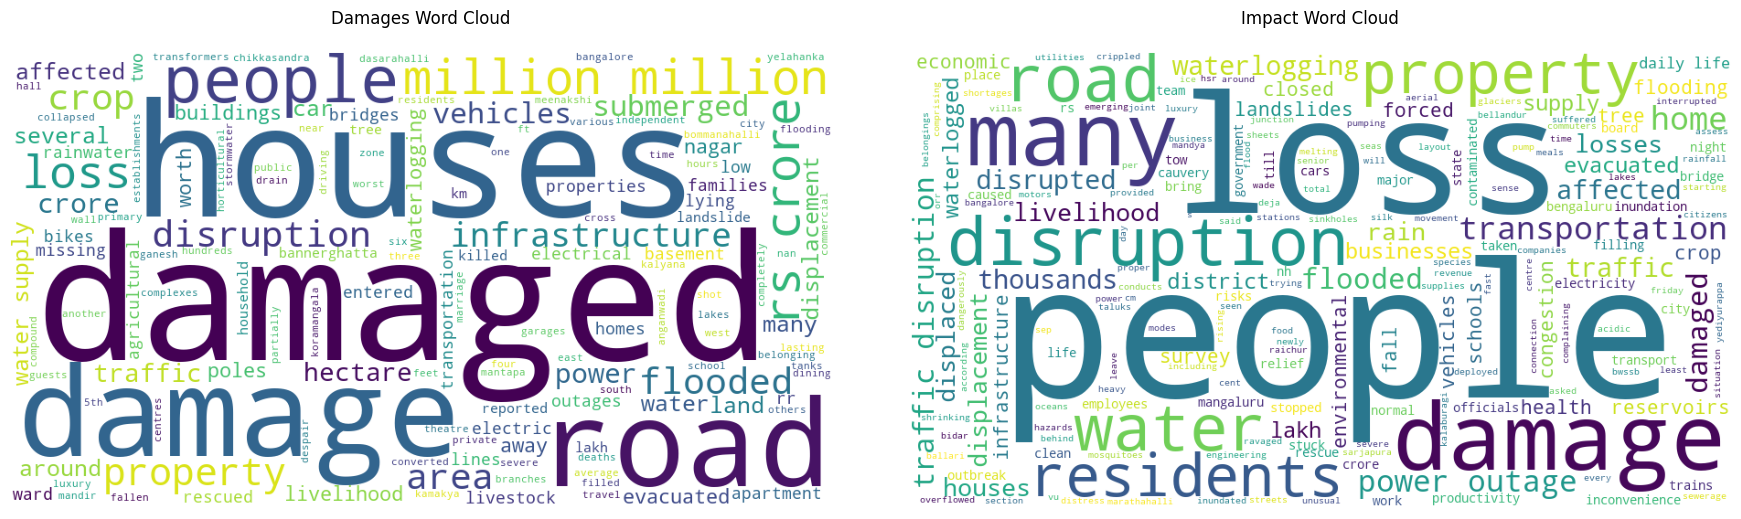

In [6]:
wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_damage)
 
# plot the WordCloud image                       
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].imshow(wordcloud)
axes[0].axis("off")
axes[0].set_title('Damages Word Cloud\n')
plt.tight_layout(pad = 0)
 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_impact)
 
# plot the WordCloud image                       
axes[1].set_title('Impact Word Cloud\n')
axes[1].imshow(wordcloud)
axes[1].axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [167]:
#d = b_df[(b_df['year']=='2023') & (b_df['end_date'].str.contains("2023")) & (b_df['location'].str.contains("Bengaluru"))]

In [62]:
loc = []
year = []
rain = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    try:
        R = gb_df['rainfall'][i].strip('][').replace(r"'", '').split(', ')
    except:
        pass
    
    r = 0
    c = 0
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])
        
        for i in R:
            try:
                if 'mm' in i:
                    r = r+float(i.split('mm')[0].strip())
                    c+=1
                if 'cm' in i:
                    r = r+(float(i.split('cm')[0].strip())*10)
                    c+=1
            except:
                pass
        if j in loc:
            try:
                rain[loc.index(j)] = str(rain[loc.index(j)]) + ', ' + str(r/c)
            except:
                try:
                    rain.append(r/c)
                except:
                    rain.append('0')

[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0]
['Vibgyor High School', 'Thubarahalli', 'Bellandur', 'Vidyapeeta', 'Mahadevapura', 'RR Nagar', 'Yelahanka']
[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0]
['K.R. Circle', 'RT Nagar', 'Malleshwaram', 'Kumara Krupa road', 'Windson Manor junction', 'Mahalakshmi Layout', 'Malleswaram']
[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0]
['Jayanagar', 'Kengeri', 'RR Nagar', 'Uttarahalli', 'Nagarabhavi', 'Nayandahalli', 'Roopena Agrahara', 'Haralur Junction (Hosur Road)', 'Nagarjuna Junction (Bannerghatta Road)', 'Anil Kumble Circle', 'MG Road', 'Kalyan Nagar Bridge', 'Nayandahalli', 'Seshadripuram Railway Underpass', 'Hennur Junction', 'Mahadevapura', 'Airport Road']
[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.

In [60]:
i

'10 centimetres'

In [5]:
loc = []
year = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])

In [64]:
new_loc = []
corr = []
new_year = []
new_rain = []
for i in range(len(loc)):
    try:
        location = geolocator.geocode(f"{loc[i]} Karnataka")
        corr.append((location.raw['lon'],location.raw['lat']))
        new_loc.append(loc[i])
        new_year.append(year[i])
        new_rain.append(rain[i])
    except:
        try:
            location = geolocator.geocode(f"{loc[i].split(' ')[0]} Karnataka")
            corr.append((location.raw['lon'],location.raw['lat']))
            new_loc.append(loc[i])
            new_year.append(year[i])
            new_rain.append(rain[i])
        except:
            continue

In [7]:
df = pd.DataFrame()
df['area'] = new_loc
df['corr'] = corr
df['year'] = new_year

df.to_csv('bengaluru_locations.csv', index=False)

In [66]:
import geopandas as gp
import json
# gdf = gp.read_file("../Untitled Folder/boundaries/DISTRICT_BOUNDARY.shp")

# b_gdf = gdf[gdf['District'].str.contains("BENGAL@RU")]

# b_gdf.plot(color =  '#e3bccf', edgecolor = 'blue')
# flood_points = gp.read_file("../Untitled Folder/Flood points bangalore/flood_points_20_21.shp")
# vul = flood_points['Vulnerable']
# vul_coor = []
# for i in zip(flood_points['Longitude'], flood_points['Latitude']):
#     vul_coor.append(i)

with open('../Urban Floods/dashboard/maps/bangalore.geojson') as handle:
    area_geo = json.loads(handle.read())

In [48]:
new_year

['2023, 2021, 2020, 2019, 2016',
 '2023, 2021, 2020',
 '2023',
 '2023',
 '2023, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023',
 '2023',
 '2023, 2022',
 '2023, 2022',
 '2023, 2022',
 '2023, 2022',
 '2023',
 '2023',
 '2023, 2020',
 '2023',
 '2023',
 '2023, 2019',
 '2023, 2013',
 '2023',
 '2023',
 '2023, 2020',
 '2023, 2021',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023, 2021, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023',
 '2023, 2019',
 '2023',
 '2023, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023, 2019',
 '2023, 2021',
 '2023',
 '2023',
 '2023, 2021',
 '2023, 2019',
 '2023',
 '2023',
 '2023, 2019',
 '2023, 2019',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023, 2021',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023, 2022',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023, 2022',
 '2022',
 '2022',
 '2022, 2021',
 '2022',
 '2022',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '20

In [82]:
the_map = folium.Map(location=[12.9280951, 77.5463053], tiles='cartodbpositron', zoom_start=10)
folium.GeoJson(area_geo).add_to(the_map)
def add_markers_to_the_map(the_map, loc, corr, year, rainfall, color, icon,):
    points = list(zip(corr,loc, year, rainfall))
    for point in points:         
            
            if color=='black':
                popup_text = "{}".format(point[1])
                
                popup = folium.Popup(popup_text, autopan='False', parse_html=True, min_width=300, max_width=300)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                except:
                    continue
            else:
                popup_text = "Name: "+point[1] +"<br>"+ "Flooded on: "+point[2]+"<br>"+"Average Recorded Rainfall: "+str(point[3])+' mm'

                popup = folium.Popup(folium.IFrame(popup_text), autopan='False', parse_html=True, min_width=200, max_width=200)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                    circle = folium.Circle(location=[point[0][1], point[0][0]], 
                                           radius=400, color=color).add_to(the_map)
                except:
                    continue
    return the_map

In [83]:
# add_markers_to_the_map(the_map,vul, vul_coor, year = '', color = 'black', icon='circle')
m = add_markers_to_the_map(the_map,new_loc, corr, year = new_year, rainfall = rain, color = 'orange', icon='map-marker')

In [84]:
m

In [85]:
m.save('bengaluru_map_.html')

<h3>Hyderabad

In [86]:
gb_df = pd.read_csv('hyderabad_with_severity.csv')

gb_df = gb_df[gb_df['city']=='hyderabad']

gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]

gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Hyderabad|Telangana')]

gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

gb_df['month_year'] = month_year

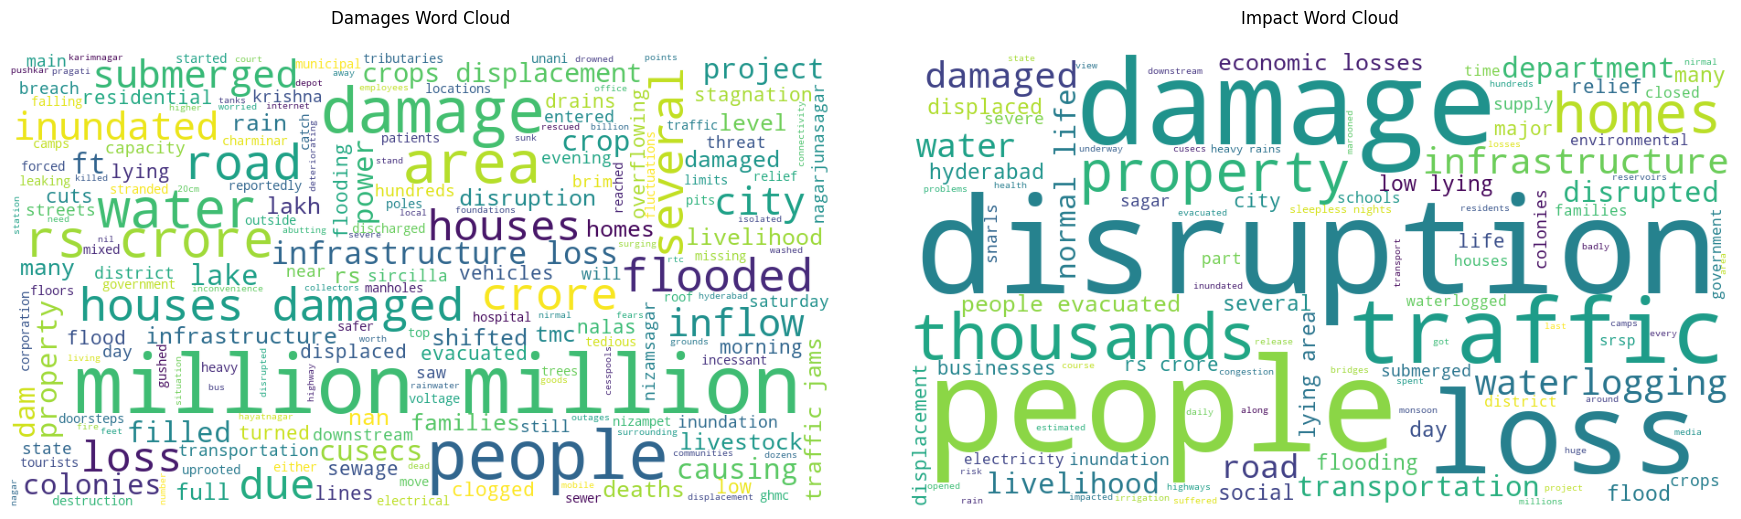

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words_damage = ''
comment_words_impact = ''
stopwords = set(STOPWORDS)
 
for val in gb_df.damage:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_damage += " ".join(tokens)+" "
for val in gb_df.impact:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_impact += " ".join(tokens)+" "

comment_words_damage = comment_words_damage.replace('[','').replace(']','').replace("'",'').replace(',','') 
comment_words_impact = comment_words_impact.replace('[','').replace(']','').replace("'",'').replace(',','') 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_damage)
 
# plot the WordCloud image                       
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].imshow(wordcloud)
axes[0].axis("off")
axes[0].set_title('Damages Word Cloud\n')
plt.tight_layout(pad = 0)
 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_impact)
 
# plot the WordCloud image                       
axes[1].set_title('Impact Word Cloud\n')
axes[1].imshow(wordcloud)
axes[1].axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [33]:
loc = []
year = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])
            
new_loc = []
corr = []
new_year = []
for i in range(len(loc)):
    try:
        location = geolocator.geocode(f"{loc[i]} Hyderabad")
        corr.append((location.raw['lon'],location.raw['lat']))
        new_loc.append(loc[i])
        new_year.append(year[i])
    except:
        try:
            location = geolocator.geocode(f"{loc[i].split(' ')[0]} Hyderabad")
            corr.append((location.raw['lon'],location.raw['lat']))
            new_loc.append(loc[i])
            new_year.append(year[i])
        except:
            continue

In [112]:
loc = []
year = []
rain = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    try:
        R = gb_df['rainfall'][i].strip('][').replace(r"'", '').split(', ')
    except:
        pass
    
    r = 0
    c = 0
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])
        
        for i in R:
            try:
                if 'mm' in i:
                    r = r+float(i.split('mm')[0].strip())
                    c+=1
                if 'cm' in i:
                    r = r+(float(i.split('cm')[0].strip())*10)
                    c+=1
            except:
                pass
        if j in loc:
            try:
                rain[loc.index(j)] = str(rain[loc.index(j)]) + ', ' + str(r/c)
            except:
                try:
                    rain.append(r/c)
                except:
                    rain.append('0')
                    

new_loc = []
corr = []
new_year = []
new_rain = []
for i in range(len(loc)):
    try:
        location = geolocator.geocode(f"{loc[i]} Hyderabad")
        corr.append((location.raw['lon'],location.raw['lat']))
        new_loc.append(loc[i])
        new_year.append(year[i])
        new_rain.append(rain[i])
    except:
        try:
            location = geolocator.geocode(f"{loc[i].split(' ')[0]} Hyderabad")
            corr.append((location.raw['lon'],location.raw['lat']))
            new_loc.append(loc[i])
            new_year.append(year[i])
            new_rain.append(rain[i])
        except:
            continue

In [19]:
df = pd.DataFrame()
df['area'] = new_loc
df['corr'] = corr
df['year'] = new_year

df.to_csv('hyderabad_locations.csv', index=False)

In [113]:
gdf = gp.read_file("../Urban Floods/boundaries/DISTRICT_BOUNDARY.shp")

In [114]:
the_map = folium.Map(location=[17.38405000, 78.45636000], tiles="cartodbpositron", zoom_start=10)
folium.GeoJson(gdf[gdf['District'].str.contains("HYDERABAD")]).add_to(the_map)
def add_markers_to_the_map(the_map, loc, corr, year, rainfall, color, icon,):
    points = list(zip(corr,loc, year, rainfall))
    for point in points:         
            
            if color=='black':
                popup_text = "{}".format(point[1])
                
                popup = folium.Popup(popup_text, autopan='False', parse_html=True, min_width=300, max_width=300)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                except:
                    continue
            else:
                popup_text = "Name: "+point[1] +"<br>"+ "Flooded on: "+point[2]+"<br>"+"Average Recorded Rainfall: "+str(point[3])+' mm'

                popup = folium.Popup(folium.IFrame(popup_text), autopan='False', parse_html=True, min_width=200, max_width=200)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                    circle = folium.Circle(location=[point[0][1], point[0][0]], 
                                           radius=400, color=color).add_to(the_map)
                except:
                    continue
    return the_map

In [115]:
m = add_markers_to_the_map(the_map,new_loc, corr, new_year, new_rain, color = 'orange', icon='map-marker')

In [116]:
m

In [101]:
m.save('hyderabad_map_.html')

<h3>Chennai

In [102]:
gb_df = pd.read_csv('chennai_with_severity.csv')

gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]

gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Chennai|Tamil Nadu')]

gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

gb_df['month_year'] = month_year

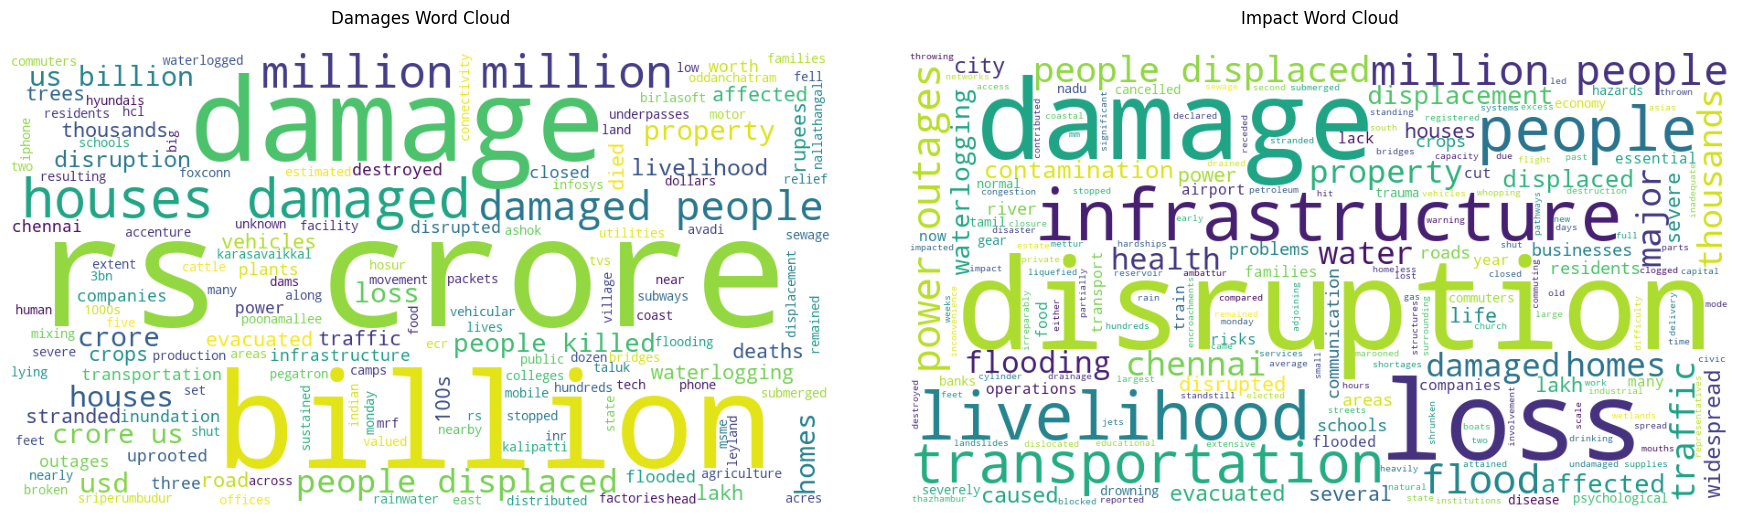

In [76]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words_damage = ''
comment_words_impact = ''
stopwords = set(STOPWORDS)
 
for val in gb_df.damage:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_damage += " ".join(tokens)+" "
for val in gb_df.impact:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_impact += " ".join(tokens)+" "

comment_words_damage = comment_words_damage.replace('[','').replace(']','').replace("'",'').replace(',','') 
comment_words_impact = comment_words_impact.replace('[','').replace(']','').replace("'",'').replace(',','') 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_damage)
 
# plot the WordCloud image                       
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].imshow(wordcloud)
axes[0].axis("off")
axes[0].set_title('Damages Word Cloud\n')
plt.tight_layout(pad = 0)
 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_impact)
 
# plot the WordCloud image                       
axes[1].set_title('Impact Word Cloud\n')
axes[1].imshow(wordcloud)
axes[1].axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [39]:
loc = []
year = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])

corr = []
new_loc = []
new_year = []
for i in range(len(loc)):
    try:
        location = geolocator.geocode(f"{loc[i]} Chennai")
        corr.append((location.raw['lon'],location.raw['lat']))
        new_loc.append(loc[i])
        new_year.append(year[i])
    except:
        try:
            location = geolocator.geocode(f"{loc[i].split(' ')[0]} Chennai")
            corr.append((location.raw['lon'],location.raw['lat']))
            new_loc.append(loc[i])
            new_year.append(year[i])
        except:
            continue

In [103]:
loc = []
year = []
rain = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    try:
        R = gb_df['rainfall'][i].strip('][').replace(r"'", '').split(', ')
    except:
        pass
    
    r = 0
    c = 0
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])
        
        for i in R:
            try:
                if 'mm' in i:
                    r = r+float(i.split('mm')[0].strip())
                    c+=1
                if 'cm' in i:
                    r = r+(float(i.split('cm')[0].strip())*10)
                    c+=1
            except:
                pass
        if j in loc:
            try:
                rain[loc.index(j)] = str(rain[loc.index(j)]) + ', ' + str(r/c)
            except:
                try:
                    rain.append(r/c)
                except:
                    rain.append('0')
                    

new_loc = []
corr = []
new_year = []
new_rain = []
for i in range(len(loc)):
    try:
        location = geolocator.geocode(f"{loc[i]} Chennai")
        corr.append((location.raw['lon'],location.raw['lat']))
        new_loc.append(loc[i])
        new_year.append(year[i])
        new_rain.append(rain[i])
    except:
        try:
            location = geolocator.geocode(f"{loc[i].split(' ')[0]} Chennai")
            corr.append((location.raw['lon'],location.raw['lat']))
            new_loc.append(loc[i])
            new_year.append(year[i])
            new_rain.append(rain[i])
        except:
            continue

In [22]:
df = pd.DataFrame()
df['area'] = new_loc
df['corr'] = corr
df['year'] = new_year

df.to_csv('chennai_locations.csv', index=False)

In [104]:
the_map = folium.Map(location=[13.067439, 80.237617], tiles="cartodbpositron", zoom_start=10)
folium.GeoJson(gdf[gdf['District'].str.contains("CHENNAI")]).add_to(the_map)
def add_markers_to_the_map(the_map, loc, corr, year, rainfall, color, icon,):
    points = list(zip(corr,loc, year, rainfall))
    for point in points:         
            
            if color=='black':
                popup_text = "{}".format(point[1])
                
                popup = folium.Popup(popup_text, autopan='False', parse_html=True, min_width=300, max_width=300)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                except:
                    continue
            else:
                popup_text = "Name: "+point[1] +"<br>"+ "Flooded on: "+point[2]+"<br>"+"Average Recorded Rainfall: "+str(point[3])+' mm'

                popup = folium.Popup(folium.IFrame(popup_text), autopan='False', parse_html=True, min_width=200, max_width=200)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                    circle = folium.Circle(location=[point[0][1], point[0][0]], 
                                           radius=400, color=color).add_to(the_map)
                except:
                    continue
    return the_map

In [105]:
m = add_markers_to_the_map(the_map,new_loc, corr, new_year,new_rain, color = 'orange', icon='map-marker')

In [106]:
m

In [107]:
m.save('chennai_map_.html')

<h3>Mumbai

In [44]:
gb_df = pd.read_csv('mumbai_with_severity.csv')

gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]

gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Mumbai|Maharashtra')]

gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

gb_df['month_year'] = month_year

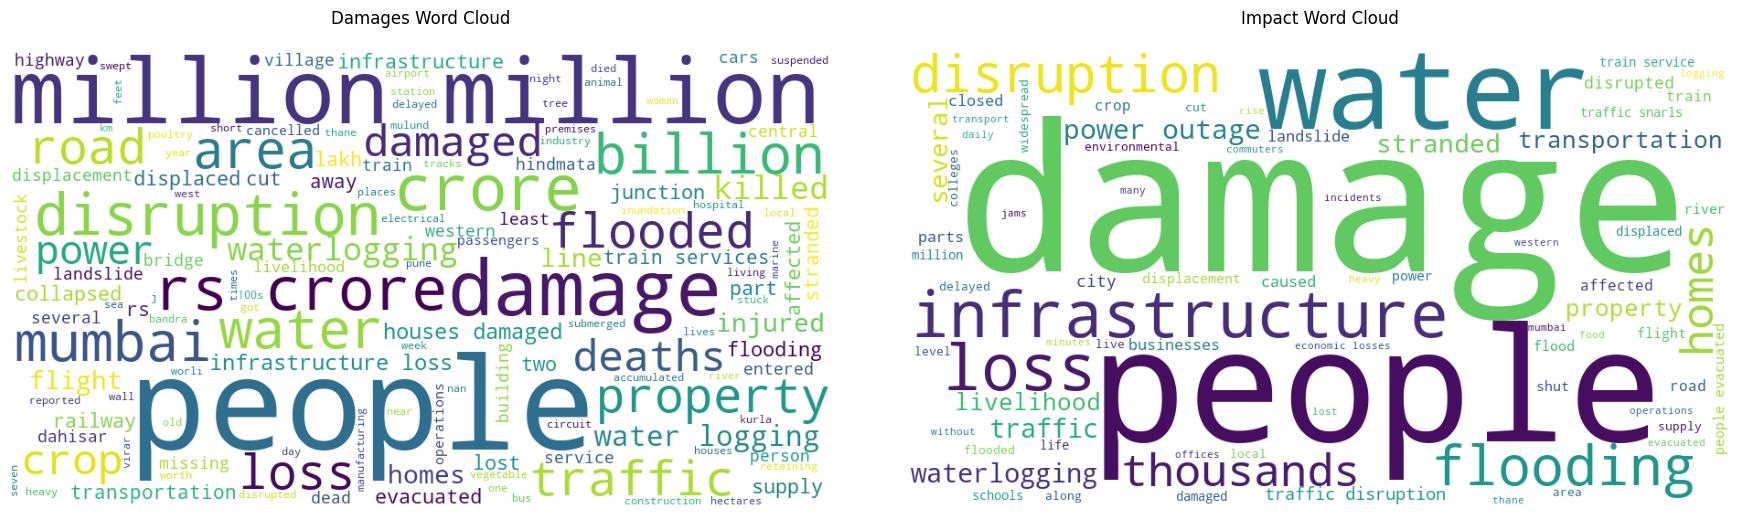

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words_damage = ''
comment_words_impact = ''
stopwords = set(STOPWORDS)
 
for val in gb_df.damage:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_damage += " ".join(tokens)+" "
for val in gb_df.impact:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_impact += " ".join(tokens)+" "

comment_words_damage = comment_words_damage.replace('[','').replace(']','').replace("'",'').replace(',','') 
comment_words_impact = comment_words_impact.replace('[','').replace(']','').replace("'",'').replace(',','') 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_damage)
 
# plot the WordCloud image                       
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].imshow(wordcloud)
axes[0].axis("off")
axes[0].set_title('Damages Word Cloud\n')
plt.tight_layout(pad = 0)
 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_impact)
 
# plot the WordCloud image                       
axes[1].set_title('Impact Word Cloud\n')
axes[1].imshow(wordcloud)
axes[1].axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [50]:
loc = []
year = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])

corr = []
new_loc = []
new_year = []
for i in range(len(loc)):
    try:
        location = geolocator.geocode(f"{loc[i]} Maharashtra")
        corr.append((location.raw['lon'],location.raw['lat']))
        new_loc.append(loc[i])
        new_year.append(year[i])
    except:
        try:
            location = geolocator.geocode(f"{loc[i].split(' ')[0]} Maharashtra")
            corr.append((location.raw['lon'],location.raw['lat']))
            new_loc.append(loc[i])
            new_year.append(year[i])
        except:
            continue

In [46]:
df = pd.DataFrame()
df['area'] = new_loc
df['corr'] = corr
df['year'] = new_year

df.to_csv('mumbai_locations.csv', index=False)

In [51]:

the_map = folium.Map(location=[18.96667, 72.83333], tiles="cartodbpositron", zoom_start=10)
folium.GeoJson(gdf[gdf['District'].str.contains("MUMBAI")]).add_to(the_map)
def add_markers_to_the_map(the_map, loc, corr, year, color, icon,):
    points = list(zip(corr,loc, year))
    for point in points:         
            
            if color=='black':
                popup_text = "{}".format(point[1])
                
                popup = folium.Popup(popup_text, autopan='False', parse_html=True, min_width=300, max_width=300)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                except:
                    continue
            else:
                popup_text = "Name: "+point[1] +"<br>"+ "Flooded on: "+point[2]

                popup = folium.Popup(folium.IFrame(popup_text), autopan='False', parse_html=True, min_width=200, max_width=200)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                    circle = folium.Circle(location=[point[0][1], point[0][0]], 
                                           radius=400, color=color).add_to(the_map)
                except:
                    continue
    return the_map

In [52]:
m = add_markers_to_the_map(the_map,new_loc, corr, new_year, color = 'orange', icon='map-marker')

In [53]:
m

In [54]:
m.save('mumbai_map.html')

<h3>Delhi

In [55]:
gb_df = pd.read_csv('delhi_with_severity.csv')

gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]

gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Delhi')]

gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

gb_df['month_year'] = month_year

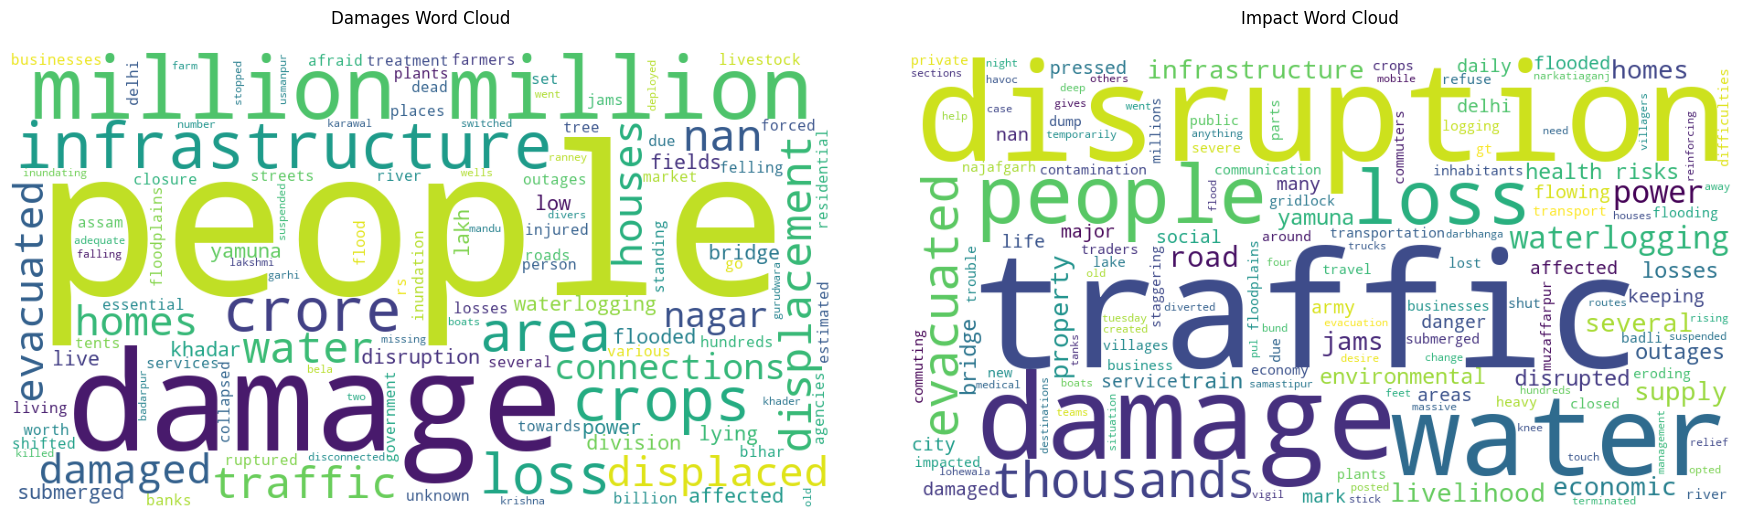

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words_damage = ''
comment_words_impact = ''
stopwords = set(STOPWORDS)
 
for val in gb_df.damage:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_damage += " ".join(tokens)+" "
for val in gb_df.impact:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_impact += " ".join(tokens)+" "

comment_words_damage = comment_words_damage.replace('[','').replace(']','').replace("'",'').replace(',','') 
comment_words_impact = comment_words_impact.replace('[','').replace(']','').replace("'",'').replace(',','') 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_damage)
 
# plot the WordCloud image                       
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].imshow(wordcloud)
axes[0].axis("off")
axes[0].set_title('Damages Word Cloud\n')
plt.tight_layout(pad = 0)
 

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_impact)
 
# plot the WordCloud image                       
axes[1].set_title('Impact Word Cloud\n')
axes[1].imshow(wordcloud)
axes[1].axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [56]:
loc = []
year = []
for i in range(len(gb_df['areas_affected'])):
    L = gb_df['areas_affected'][i].strip('][').replace(r"'", '').split(', ')
    y = gb_df['month_year'][i]
    for j in L:
        if j in loc:
            if y.split('-')[1] not in year[loc.index(j)]:
                year[loc.index(j)] = year[loc.index(j)] + ', ' + y.split('-')[1]
            continue
        else:
            loc.append(j)
            year.append(y.split('-')[1])

corr = []
new_loc = []
new_year = []
for i in range(len(loc)):
    try:
        location = geolocator.geocode(f"{loc[i]} Delhi")
        corr.append((location.raw['lon'],location.raw['lat']))
        new_loc.append(loc[i])
        new_year.append(year[i])
    except:
        try:
            location = geolocator.geocode(f"{loc[i].split(' ')[0]} Delhi")
            corr.append((location.raw['lon'],location.raw['lat']))
            new_loc.append(loc[i])
            new_year.append(year[i])
        except:
            continue

In [28]:
df = pd.DataFrame()
df['area'] = new_loc
df['corr'] = corr
df['year'] = new_year

df.to_csv('delhi_locations.csv', index=False)

In [57]:
the_map = folium.Map(location=[28.70405920, 77.10249020], tiles="cartodbpositron", zoom_start=10)
folium.GeoJson(gdf[gdf['STATE'].str.contains("DELHI")]).add_to(the_map)
def add_markers_to_the_map(the_map, loc, corr, year, color, icon,):
    points = list(zip(corr,loc, year))
    for point in points:         
            
            if color=='black':
                popup_text = "{}".format(point[1])
                
                popup = folium.Popup(popup_text, autopan='False', parse_html=True, min_width=300, max_width=300)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                except:
                    continue
            else:
                popup_text = "Name: "+point[1] +"<br>"+ "Flooded on: "+point[2]

                popup = folium.Popup(folium.IFrame(popup_text), autopan='False', parse_html=True, min_width=200, max_width=200)
                try:
                    marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                           popup=popup, 
                                           icon = folium.Icon(color=color, icon=icon, prefix='fa')).add_to(the_map)
                    circle = folium.Circle(location=[point[0][1], point[0][0]], 
                                           radius=400, color=color).add_to(the_map)
                except:
                    continue
    return the_map

In [58]:
m = add_markers_to_the_map(the_map,new_loc, corr, new_year, color = 'orange', icon='map-marker')

In [59]:
m

In [60]:
m.save('delhi_map.html')

In [74]:
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(12.9280951, 77.5463053)
station = stations.fetch(30)

# Print DataFrame
print(station)

                                                    name country region  \
id                                                                        
43295                                          Bangalore      IN     KA   
43296                      Bangalore / Hindustan Airport      IN     KA   
VOBL0  Bangalore / Bengaluru / Devenahalli / BIAL 2 W...      IN     KA   
43272                              Chintamani / Sugut?ru      IN     KA   
43299                                  Kolar Gold Fields      IN     KA   
43289                                             Mandya      IN     KA   
43264                             Chikkanahalli / Sadali      IN     KA   
43301                                         Dharmapuri      IN     TN   
43291                                             Mysore      IN     KA   
43302                                        Tiruppattur      IN     TN   
43271                                        Arogyavaram      IN     AP   
43322                    

In [75]:
st = pd.DataFrame(station)

In [76]:
st

name country region  \
id                                                                        
43295                                          Bangalore      IN     KA   
43296                      Bangalore / Hindustan Airport      IN     KA   
VOBL0  Bangalore / Bengaluru / Devenahalli / BIAL 2 W...      IN     KA   
43272                              Chintamani / Sugut?ru      IN     KA   
43299                                  Kolar Gold Fields      IN     KA   
43289                                             Mandya      IN     KA   
43264                             Chikkanahalli / Sadali      IN     KA   
43301                                         Dharmapuri      IN     TN   
43291                                             Mysore      IN     KA   
43302                                        Tiruppattur      IN     TN   
43271                                        Arogyavaram      IN     AP   
43322                       Chamarajnagar / Chamrajnagar      IN     KA   
43340                                            Yercaud      IN     TN   
43263                                             Hassan      IN     KA   
43325                                              Salem      IN     TN   
43303                                            Vellore      IN     TN   
43233                                        Chitradurga      IN     KA   
43317                                     Udhagamandalam      IN     TN   
43318                                            Coonoor      IN     TN   
43237                                          Anantapur      IN     AP   
43260                                       Chickmagalur      IN     KA   
43326                                    Kallakkurichchi      IN     TN   
43287                                           Madikeri      IN     KA   
43277                                          Tiruttani      IN     TN   
43321                             Coimbatore / Peelamedu      IN     TN   
43241                                           Cuddapah      IN     AP   
43319                                         Coimbatore      IN     TN   
43342                                       K. Paramathy      IN     TN   
VOTP0                               Tirupati / Renigunta      IN     AP   
43316                                           Nilambur      IN     KL   

         wmo  icao  latitude  longitude  elevation      timezone hourly_start  \
id                                                                              
43295  43295  <NA>   12.9667    77.5833      920.0  Asia/Kolkata   1973-01-01   
43296  43296  VOBG   12.9500    77.6333      888.0  Asia/Kolkata   2005-05-07   
VOBL0   <NA>  VOBL   13.1979    77.7063      897.0  Asia/Kolkata   2008-07-21   
43272  43272  <NA>   13.2000    78.0667      857.0  Asia/Kolkata   2015-12-08   
43299  43299  <NA>   12.9500    78.3000        0.0  Asia/Kolkata          NaT   
43289  43289  <NA>   12.5000    76.8333      695.0  Asia/Kolkata   1981-10-31   
43264  43264  <NA>   13.6667    77.9167      672.0  Asia/Kolkata   2015-12-10   
43301  43301  <NA>   12.1333    78.0333      396.0  Asia/Kolkata   1977-11-25   
43291  43291  VOMY   12.3000    76.7000      765.0  Asia/Kolkata   1944-01-01   
43302  43302  <NA>   12.4833    78.5667      385.0  Asia/Kolkata   2015-12-12   
43271  43271  <NA>   13.5333    78.5000      696.0  Asia/Kolkata   1973-01-01   
43322  43322  <NA>   11.9333    76.9333      760.0  Asia/Kolkata   2015-12-08   
43340  43340  <NA>   11.7500    78.1667     1463.0  Asia/Kolkata   2015-12-07   
43263  43263  <NA>   13.0000    76.1500      955.0  Asia/Kolkata   2002-05-22   
43325  43325  <NA>   11.6500    78.1667      279.0  Asia/Kolkata   1944-01-01   
43303  43303  VOVR   12.9167    79.1500      213.0  Asia/Kolkata   1944-01-01   
43233  43233  <NA>   14.2333    76.4333      724.0  Asia/Kolkata   1944-01-01   
43317  43317  <NA>   11.4000    76.7333     2236.0  Asia/Kolkata   1944-01-01   
43318  43318  <NA>   11.3500   

In [77]:
t = folium.Map(location=[12.9280951, 77.5463053], tiles="cartodbpositron", zoom_start=10)

TypeError: string indices must be integers

In [78]:
for i in range(station.shape[0]):
    lat = station['latitude'][i]
    long = station['longitude'][i]
    popup_text = "{}".format(station['name'][i])         
    popup = folium.Popup(popup_text, autopan='False', parse_html=True, min_width=300, max_width=300)
    marker = folium.Marker(location=[lat, long], 
                                               popup=popup, 
                                               icon = folium.Icon(color='orange', icon='map-marker', prefix='fa')).add_to(t)

In [79]:
t

In [7]:
!pip install rasterio

In [3]:
import os
import leafmap.leafmap as leafmap

F:\softwares\ana\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
F:\softwares\ana\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [11]:
m = folium.Map()

In [17]:
import rasterio

data = rasterio.open('test_image.tif')
i = data.read(1)

In [18]:
img = folium.raster_layers.ImageOverlay(image=i, name='Flood', bounds=[[-82, -180], [82, 180]])

In [19]:
img.add_to(m)


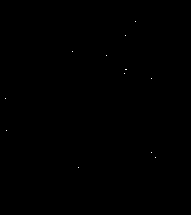

In [20]:
m